## Notebook Summary - EDA
---
#### This contents of this notebook includes:
- preliminary EDA on the combined subreddit dataset and the individual separate subreddit datasets
- note about outliers and descriptive statistics
- preliminary look at most frequent words using CountVectorizer to inform additional data cleaning/pre-processing

In [27]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 2000

# increasing the # of rows I can view
# pd.set_option('display.max_rows', 20000)

## 1. EDA on Separate Subreddits - to help decide on some additional data cleaning needs & look at overall distribution

### Load in data

In [2]:
beauty = pd.read_csv('cleaned_datasets/beauty_cleaned.csv')
skincare = pd.read_csv('cleaned_datasets/skincare_cleaned.csv')

In [3]:
beauty.head()

,author,text,text_length,word_count,subreddit
0,Missy_Pantone,Does anyone have experience with Sidmool Saccharo Ferment Sparkle First Ampoule?,83,11,asian_beauty
1,Rntonie35,Love my hair color! Blended nicely with my grays,51,9,asian_beauty
2,flckeringfox_,What’s your best eye cream to brighten the area?,51,9,asian_beauty
3,DefinitionAdvanced25,ASMR FLAWLESS SKIN KOREAN SKINCARE ROUTINE,45,6,asian_beauty
4,etoileneha,Has anyone tried the Beauty of Joseon - Red Bean Refreshing Pore Mask?,73,13,asian_beauty


In [4]:
skincare.head()

,author,text,text_length,word_count,subreddit
0,yuura1,"[Product request] self harm scar help - Hello, i have self harm scars that are not deep and recent.\nIts just a bit darker than the rest of the skin. Its been only 2 weeks since i got the scar. Its making me uncomfy and anxious, my parents are shaming me for it, and a lot of my friend start asking.\n\nIs there a way for me to make the scar look less visible ? I've been looking at scar remover gel(heard alvene cicalfate is a good one) or silicon patches. Are these things really working ?\n\nThankyou guys !",505,100,skincare_addiction
1,SKKKKRRT2,"29 y.o F, was on Orilissa, a GnRH antagonist. See comment for description",76,13,skincare_addiction
2,goldpunch,[Product Question] liposamal vitamin c vs ascorbic acid - I am searching vitamin v serums right now. I saw liposamal vitamin c serum on the internet. And it is my local brand. They claims it is more stable version of vitamin c. Is that true?,241,45,skincare_addiction
3,snd1zzi,can anyone tell me what these bumps are on my face?,54,11,skincare_addiction
4,Prestigious-Ad5884,[routine help] should I use retinol? Im 14. I bought it and now realizing there is slightly no point.,104,19,skincare_addiction


### Longest & shortest posts

In [5]:
beauty.sort_values(by='word_count', ascending=False)

,author,text,text_length,word_count,subreddit
3757,snailslimeandbeespit,"Cactus is the New Snail: L’Herboflore Aqua Plus Moisturizing Toner Review - **[Please note: there are no affiliate links in this review. I have no connection to L’Herboflore or Beautibi, other than being an enthusiastic customer willing to hand over a lot of my money. The only things I received for writing this review are firm, bouncy skin and a sore wrist.]**\n\n**[Also, there aren't any photos because it's evening here, and there are too many shadows, but I link to some sites where you can see pictures.]**\n\nOn a trip to Taiwan last October, I sought out the L’Herboflore stand in the Taipei 101 building, eager to get my hands on some sheet masks. Much to my surprise, I discovered that L’Herboflore carries a lot of products that aren’t sheet masks, such as cleansers, a toner, eye cream, exfoliating gel, moisturizers, body lotion, shampoo, conditioner, body wash, and powdered health drinks. I purchased a couple of these non-sheet mask items that I’ll review down the road (I still need to finish testing them), and I’ve been impressed enough with them that when I saw that the U.S. site Beautibi stocks some L’Herboflore products, I decided to order the Aqua Plus Moisturizing Toner, something I regretted not picking up in Taipei. Aside from the fact that L’Herboflore products have impressed me, I was eager to incorporate more Taiwanese products, other than sheet masks, into my routine, since T-Beauty doesn’t get as much love around here as products from Korea, and to a lesser extent, Japan. \n\n*The low-down: what is this product?*\n\nThe L’Herboflore 蕾舒翠 [Aqua Plus Moisturizing Toner 水盈潤晶露](http://www.lherboflore.com.tw/product_detail.aspx?series=9&amp;classid=29&amp;id=88) (hereafter known as Aqua Toner) is a hydrating toner that is part of [L’Herboflore’s Aqua Plus line](http://www.lherboflore.com.tw/product_list.aspx?series=9&amp;classid=29), which features products made from organic cactus elixir. The company claims that this toner will soothe irritated ski...",20888,3582,asian_beauty
3675,foir,"Actives: An AB Intro Guide and FAQ. - **What are they?**\n--\n\n""Actives"" are the common term for the group of power players in skincare with ingredients that have direct, active results on the skin, and have serious science backing it up. These include acids like AHAs and BHAs, and antioxidants like Vitamin C and Vitamin A (retinol and tretinoin). \n\n\n**AHAs:**\n--\n\nWhat they do:\n-\nAlpha Hydroxy Acids (**AHA**) are **water-soluble** and dissolve the bonds of skin cells on the outer layers of the skin, sloughing off dead skin and the glue that holds them together. This is *not immediate*, it just speeds up the process. This helps brighten and plump skin so it is not uncommon to recommend them to users who want to **combat fine lines and signs of aging**, are looking to **reverse sun damage or hyperpigmentation**, or are seeking a **more even skin tone and texture** in general. All AHAs have humectant properties, making them particularly nice for dry skin types with continued use. They all also **increase photosensitivity**, meaning sunscreen is even more important while using an AHA! There are also sources that show that AHAs increase dermal thickness and improve collagen density as well as quality of elastic fibers. [1](http://europepmc.org/abstract/MED/8642081) [2](http://onlinelibrary.wiley.com/doi/10.1046/j.1365-2133.1996.d01-1088.x/abstract;jsessionid=8F1BD9BC1178A87ADF7E90B6EBD17F44.d02t02?deniedAccessCustomisedMessage=&amp;amp;userIsAuthenticated=false) [3](http://onlinelibrary.wiley.com/doi/10.1046/j.1524-4725.2001.00234.x/abstract?deniedAccessCustomisedMessage=&amp;amp;userIsAuthenticated=false)\n\nMost Common Types:\n--\n\n* **Glycolic Acid:** It has the smallest molecules in the group so can penetrate skin deeply and easily, making it the most effective for treating fine lines, acne, blackheads, dullness, oiliness etc. An all around good choic

In [6]:
skincare.sort_values(by='word_count', ascending=False)

,author,text,text_length,word_count,subreddit
4586,LaikaBauss31,"[Review] Non-AB Product Review + Tips - Dark Circles, Normal-Sensitive Skin - Hello, I wanted to leave an honest review for some products I’ve tried over the last ~2 years. At the end I also included some random tips that worked for me (warning: these will get lengthy, an attempt at TL;DR is at the bottom of the post).\n\n**Skin**: Normal, hereditary dark circles + bags (can probably carry groceries in these), easily sensitive, some parts leaning towards dehydrated. \n\n\n#Cleansers\n[Burt's Bees Sensitive Facial Cleanser](https://www.burtsbees.com/product/sensitive-facial-cleanser/VM-01430-00.html) - Burn it with fire just like it burned the skin off my face. “Sensitive” cleanser is way too stripping for daily or 1x/2days use. The smell is dull, and the feel is sticky. Same for all burts bees products, honestly. $9.\n\n\n[Garnier Skinactive Micellar Water](https://www.target.com/p/garnier-skinactive-micellar-cleansing-water-for-all-skin-types-13-5-fl-oz/-/A-39599037?ref=tgt_adv_XS000000&amp;AFID=google_pla_df&amp;fndsrc=tgtao&amp;CPNG=PLA_Health%2BBeauty%2BShopping_Local&amp;adgroup=SC_Health%2BBeauty&amp;LID=700000001170770pgs&amp;network=g&amp;device=c&amp;location=9032151&amp;ds_rl=1246978&amp;ds_rl=1247077&amp;ds_rl=1246978&amp;gclid=Cj0KCQjw5J_mBRDVARIsAGqGLZA-6g6aBzi1HaQfbnyD-jfv8JwrEz6dIZoBYPtaF3nMPvA09a5nSi4aAjknEALw_wcB&amp;gclsrc=aw.ds) - Good for removing heavy makeup. Doesn’t distinguish between a layer of makeup and a nice, hard to repair, fresh layer of skin. The feel is weird for a “no rinse” cleanser - definitely rinse off. The smell is normal. *Dark Circles Undereye* - yes though obviously hurts if you get it in the tear duct. $7\n\n[CeraVe Hydrating Facial Cleanser](https://www.cerave.com/skincare/cleansers/hydrating-facial-cleanser) and [Cetaphil Daily Cleanser](https://www.cetaphil.com/daily-facial-cleanser) - Experiments with both ends of the “normal” spectrum. Normal to Dry leaves skin too tight but doesn’t cause much redness. Normal to Oi...",21065,3271,skincare_addiction
4659,ddshroud,"[Shelfie] [Review] The shelf after six months of being an SCA lurker. :) - Image: https://1drv.ms/u/s!ApODcb8dQE8mgaotQtSoRR7inPANMQ\n\nHi, everyone! Recently started my skincare journey about six months ago when my friend and co-worker took me along a Sephora trip near the office. I had never really paid attention to beauty and skincare; case in point, my previous routine consisted only of face wash (whatever Kiehl's had for men) and the odd moisturizer (also whatever Kiehl's had for men) every now and then. \n\nSince then, I've been hooked - following several great skin care blogs (Beautiful with Brains, Lab Muffin, Fifty Shades of Snail, Gothamista, etc.) and lurking on this sub. I also enjoy reading the discussions on how to optimize skin care product usage, maxing out effectiveness, etc. \n\nIn addition, I never realized how comforting and satisfying it is to do good self-care and investing in that accordingly. I found the multi-step evening routine such a nice wind-down after long work days.\n\nI've purchased a lot of recommendations from friends, the sub, and beyond, and I think I've narrowed down a good routine that works for me. Below are my skin details and a list of products I've gotten since starting. Warning: it's a lot, but eager to share what I've tried. :)\n\n**Skin Type**: Generally normal to some oiliness in cheeks\n**Location**: NYC\n**Personal Details** - 30, M, Filipino/Spanish mix with fairly light skin, work in an office environment\n**Concerns** - some light dryness from tret, dehydration, anti-aging; previous concern was the occasional acne spots, but that has mostly ceased since formalizing the routine\n**Misc Comments** - I like products that are generally easy to use/apply. Bonus points go to products with airless packaging and/or easy spreadability. I don't mind silicones as long as the product is formulated well. I tend to go f

#### *I notice that the longest posts are personal reviews and opinions. Shortest posts are links and questions*

### Distribution of post lengths

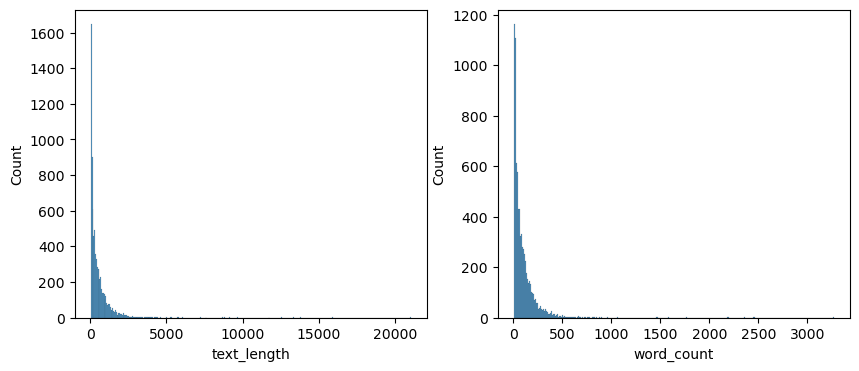

In [7]:
#create a subplot with 1 row, and 2 columns
fig, ax = plt.subplots(1,2,figsize = (10,4))

sns.histplot(data=skincare,x=skincare['text_length'], ax=ax[0])
sns.histplot(data=skincare,x=skincare['word_count'], ax=ax[1]);

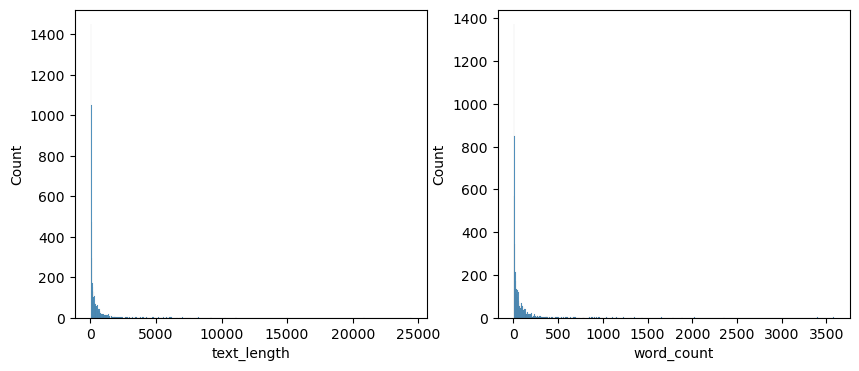

In [8]:
#create a subplot with 1 row, and 2 columns
fig, ax = plt.subplots(1,2,figsize = (10,4))

ax1 = sns.histplot(data=beauty,x=beauty['text_length'], ax=ax[0])
# ax1.set_xlim([0,2000])

ax2 = sns.histplot(data=beauty,x=beauty['word_count'], ax=ax[1])
# ax2.set_xlim(0,400);

### Checking for outliers using box plots

''

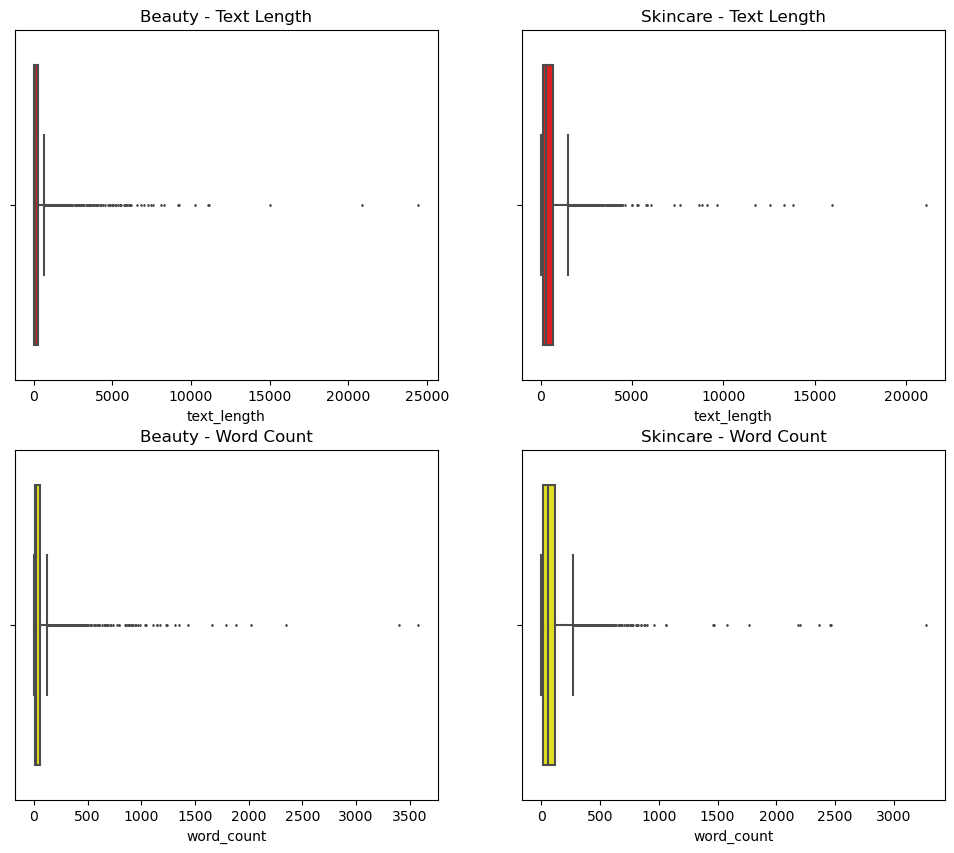

In [9]:
# checking for outliers using box plots

# create subplots
fig,ax = plt.subplots(2,2, figsize=(12,10))

sns.boxplot(data=beauty,
           x='text_length',
           orient='h',
           ax=ax[0,0],
           color='red',
           fliersize=1)

sns.boxplot(data=skincare,
           x='text_length',
           orient='h',
           ax=ax[0,1],
           color='red',
           fliersize=1)

sns.boxplot(data=beauty,
           x='word_count',
           orient='h',
           ax=ax[1,0],
           color='yellow',
           fliersize=1)

sns.boxplot(data=skincare,
           x='word_count',
           orient='h',
           ax=ax[1,1],
           color='yellow',
           fliersize=1)

ax[0,0].title.set_text('Beauty - Text Length')
ax[0,1].title.set_text('Skincare - Text Length')
ax[1,0].title.set_text('Beauty - Word Count')
ax[1,1].title.set_text('Skincare - Word Count')
;

# if I want to remove outliers add this param showfliers=False 

#### *I see that there are a lot of outliers, but I am going to keep them because longer may contain more quality texts for analysis*

### Unique users in each subreddit

In [10]:
print('unique users - beauty sub:', len(beauty['author'].unique()))
print(beauty.shape)

unique users - beauty sub: 3956
(5362, 5)


In [11]:
print('unique users - skincare sub:', len(skincare['author'].unique()))
print(skincare.shape)

unique users - skincare sub: 6311
(7879, 5)


In [12]:
#mean word_count and text length of posts by unique user
beauty_uniqueuser = beauty.groupby('author')[['word_count', 'text_length']].mean().sort_values(by='word_count', ascending=False)
beauty_uniqueuser

,word_count,text_length
author,,
snailslimeandbeespit,3582.0,20888.0
psthrowaway5572,2022.0,11091.0
sprinklingsprinkles,1882.0,11115.0
myng,1786.0,10279.0
foir,1709.0,12262.5
...,...,...
cookingwithshaila,1.0,31.0
Significant-Bike-116,1.0,55.0
mrsaadi025,1.0,32.0


In [13]:
skincare_uniqueuser = skincare.groupby('author')[['word_count', 'text_length']].mean().sort_values(by='word_count', ascending=False)
skincare_uniqueuser

,word_count,text_length
author,,
LaikaBauss31,3271.0,21065.0
ddshroud,2468.0,13784.0
fax5jrj,2460.0,13331.0
anintellectuwoof,2364.0,15923.0
arresttobyflenderson,2199.0,11747.0
...,...,...
alwinB,3.0,43.0
secretive4848,3.0,35.0
FabulousLet3188,3.0,38.0


In [14]:
#count of posts by each unique user
beauty.groupby('author').count().sort_values(by='text', ascending=False)

,text,text_length,word_count,subreddit
author,,,,
[deleted],248,248,248,248
vubao2,23,23,23,23
Shopizeaa,21,21,21,21
moisanom,19,19,19,19
allsnailedup,17,17,17,17
...,...,...,...,...
Yoghurt_Scary,1,1,1,1
Yoska0607,1,1,1,1
Young-Physical,1,1,1,1


In [15]:
skincare.groupby('author').count().sort_values(by='text', ascending=False)

,text,text_length,word_count,subreddit
author,,,,
[deleted],511,511,511,511
Doital1,11,11,11,11
yvva,11,11,11,11
ieatbugs,7,7,7,7
patchtesting,5,5,5,5
...,...,...,...,...
CookieBronte,1,1,1,1
Cookie_Cutter_Cook,1,1,1,1
Cookies_N_Grime,1,1,1,1


### Distribution of posts lengths/word counts by unique user

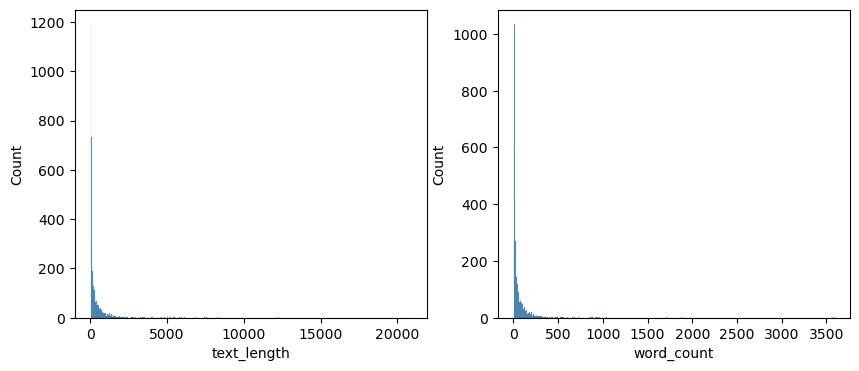

In [16]:
#create a subplot with 1 row, and 2 columns
fig, ax = plt.subplots(1,2,figsize = (10,4))

sns.histplot(data=beauty_uniqueuser,x=beauty_uniqueuser['text_length'], ax=ax[0])
sns.histplot(data=beauty_uniqueuser,x=beauty_uniqueuser['word_count'], ax=ax[1]);

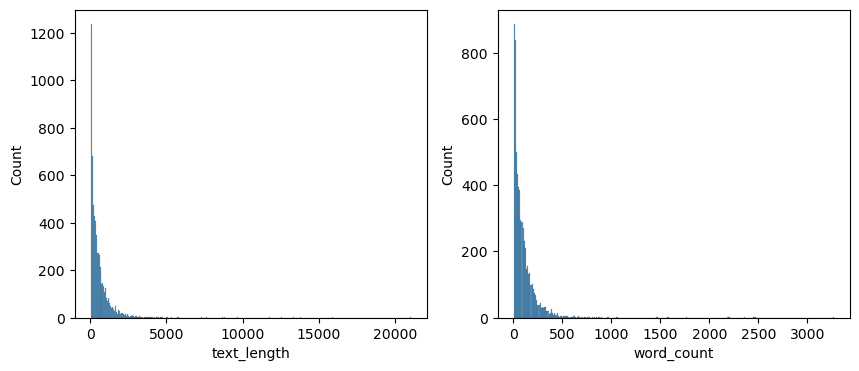

In [17]:
#create a subplot with 1 row, and 2 columns
fig, ax = plt.subplots(1,2,figsize = (10,4))

sns.histplot(data=skincare_uniqueuser,x=skincare_uniqueuser['text_length'], ax=ax[0])
sns.histplot(data=skincare_uniqueuser,x=skincare_uniqueuser['word_count'], ax=ax[1]);

---

## 2. EDA on combined, cleaned subreddits

In [18]:
# read in data
subs = pd.read_csv('cleaned_datasets/subreddits_combined.csv')

In [19]:
subs.shape

(12875, 5)

In [20]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12875 entries, 0 to 12874
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       12875 non-null  object
 1   text         12875 non-null  object
 2   text_length  12875 non-null  int64 
 3   word_count   12875 non-null  int64 
 4   subreddit    12875 non-null  object
dtypes: int64(2), object(3)
memory usage: 503.1+ KB


In [21]:
subs.head(2)

,author,text,text_length,word_count,subreddit
0,Missy_Pantone,Does anyone have experience with Sidmool Saccharo Ferment Sparkle First Ampoule?,83,11,asian_beauty
1,Rntonie35,Love my hair color! Blended nicely with my grays,51,9,asian_beauty


In [22]:
# look at general stats about each sub
subs.groupby('subreddit').describe().T

subreddit          asian_beauty  skincare_addiction
text_length count   5067.000000         7808.000000
            mean     358.888297          523.183658
            std      873.328586          756.183230
            min       31.000000           31.000000
            25%       60.000000          106.000000
            50%      105.000000          299.000000
            75%      345.000000          673.000000
            max    24449.000000        21065.000000
word_count  count   5067.000000         7808.000000
            mean      60.830274           92.430584
            std      142.685705          129.067655
            min        3.000000            3.000000
            25%       10.000000           19.000000
            50%       18.000000           54.000000
            75%       59.000000          121.000000
            max     3582.000000         3271.000000

#### *I notice that the posts in the skincare_addiction sub are generally longer than the ones in the asian_beauty sub*

### Distribution of Character & Word Count

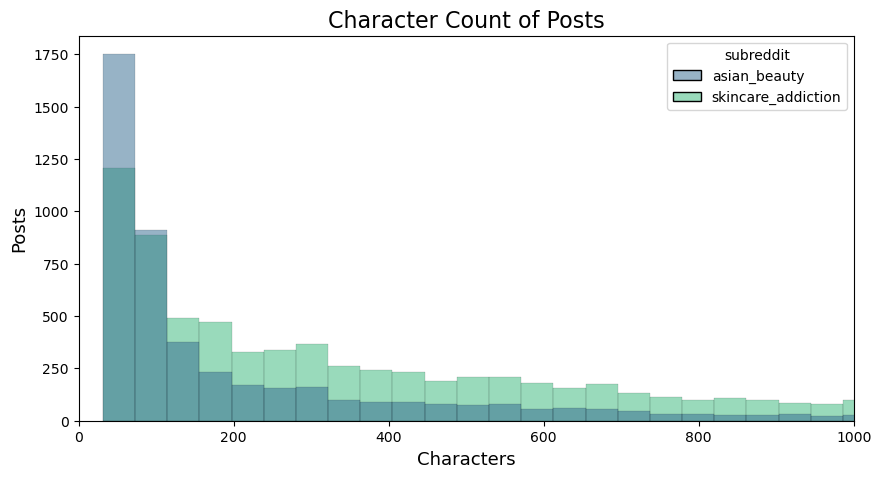

In [23]:
# Distribution of text_length and word_count
# plot a histogram

plt.figure(figsize=(10,5))
sns.histplot(data=subs, x='text_length', hue='subreddit', palette='viridis')
plt.title('Character Count of Posts', fontsize=16, fontweight = 16)
plt.xlabel('Characters', fontsize = 13)
plt.ylabel('Posts', fontsize = 13)
plt.xlim(0,1000);

# so I set the limit to be a little larger than the 75% percentile because it's hard to see what's happening without that. Is that okay?

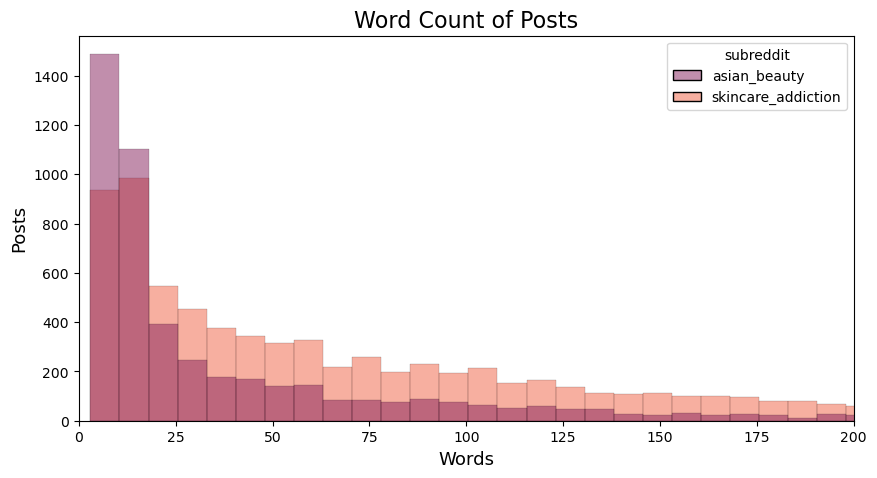

In [24]:
# plot a histogram

plt.figure(figsize=(10,5))
sns.histplot(data=subs, x='word_count', hue='subreddit', palette='rocket')
plt.title('Word Count of Posts', fontsize=16, fontweight = 16)
plt.xlabel('Words', fontsize = 13)
plt.ylabel('Posts', fontsize = 13)
plt.xlim(0,200);

plt.savefig('plots/word-count.png',dpi=300, bbox_inches = "tight")

#### *I can see that that short/tweet-like size posts are more common in the asian_beauty sub*

In [25]:
# # increasing the # of rows I can view
# pd.set_option('display.max_rows', 200)

subs[(subs['text_length'] < 100) & (subs['subreddit'] == 'asian_beauty')][:20]

,author,text,text_length,word_count,subreddit
0,Missy_Pantone,Does anyone have experience with Sidmool Saccharo Ferment Sparkle First Ampoule?,83,11,asian_beauty
1,Rntonie35,Love my hair color! Blended nicely with my grays,51,9,asian_beauty
2,flckeringfox_,What’s your best eye cream to brighten the area?,51,9,asian_beauty
3,etoileneha,Has anyone tried the Beauty of Joseon - Red Bean Refreshing Pore Mask?,73,13,asian_beauty
4,bully-maguire23,klavuu pure pearlsation micro collagen cleansing water??,59,7,asian_beauty
5,TheAwakened,"Does COSRX Balancium Comfort Ceramide Cream really have ""1% Ceramide"", is this a typo?",89,14,asian_beauty
6,Good_Excitement_2023,Verify yourself and earn free gift cards,43,7,asian_beauty
7,bully-maguire23,"skincare (exfoliants, cleansers) with kojic acid?",52,6,asian_beauty
10,andreiaz,Thoughts on the Hada Labo Tokyo Facial Sheet Mask?,53,9,asian_beauty
11,Specialist_Heron1416,Is this the expiry date or manufacture date on the bottom of my Biore Watery Gel?,84,16,asian_beauty


### Before Pre-Processing CountVectorizer words just to get a sense for what the top words may be

In [28]:
#instantiate & fit CountVectorizer
cvec = CountVectorizer(min_df=2, stop_words='english')
cvec.fit(subs['text'])

CountVectorizer(min_df=2, stop_words='english')

In [29]:
#transform data
subs_cvec = cvec.transform(subs['text'])

In [30]:
common_words = pd.DataFrame(subs_cvec.todense(), columns=cvec.get_feature_names_out())
common_words

,00,000,009,01,012,01430,018,02,025,03,...,zip,zipper,zit,zits,zitsticka,zo,zombie,zone,zoomed,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#show 20 most common words
common_words.sum().sort_values(ascending=False).head(20)

skin        12519
acne         4993
face         4758
routine      4529
ve           4470
just         4066
help         4047
use          3959
like         3928
products     3784
product      3027
using        3022
know         2621
really       2549
don          2547
cream        2523
cleanser     2459
com          2315
dry          2271
oil          2179
dtype: int64

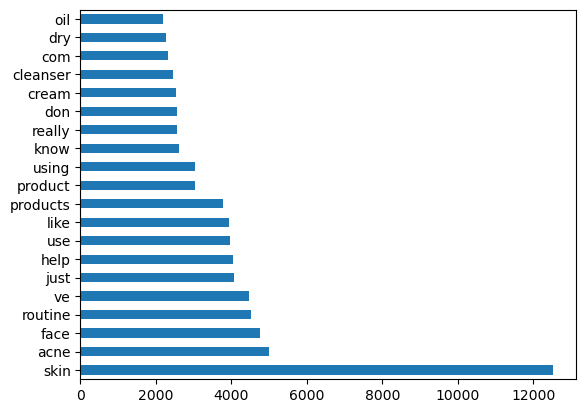

In [32]:
common_words.sum().sort_values(ascending=False).head(20).plot(kind='barh');

#### 
- *There are words here that are showing up as the most common, but I don't think all of them are relevant without grouping with other words. Looking at the posts below, it does seem like the 've' word is connected to CeraVe which makes a lot of sense! It's a pretty popular product*
- *the 'don' word is interesting because it seems like the don is a part of the word 'don't'*

In [32]:
subs[subs['text'].str.contains(' ve ')][:10]

,author,text,text_length,word_count,subreddit
1424,Midillishit,Am i purging or what :( I ve started to use mandelic acid 2-3 times a week with a %2 bha serum,97,22,asian_beauty
2242,LowraAwry,"PURITO Centella Green Level Unscented Sun spf 50 and UV filter content percentage - So I was looking around and about and all the positive reviews on purito unscented spf50+ PA++++ caught my eye. I would like to give it a try (jolse is running a prommotion till the end of the day). Yet, it only lists two uv filters Diethylamino Hydroxybenzoyl Hexyl Benzoate aka Uvinal A plus and Ethylhexyl Triazone aka Uvinul T 150 (UVB). Most of sunscreens I ve seen use a combination of three.\n\nThe percentage that they use is 3% of Uvinal A plus and 2% of Uvinul T 150. I haven't read anywhere yet at what percentage should the uv filter (chemical) be in the sunscreen to provide the desirable protection. Have you found/read any studies or research on that? I found some notes mineral sunscreen on reddit but not about the others(I could have missed them of course). I know it depends on the formula and the rest of the ingredients yet there should be a minimum, right? \n\nThanks for reading all the above (＾▽＾)",1009,181,asian_beauty
7362,No-Recognition-3606,[Product Question] Are cerave moisturizers pore clogging? If so why or how? - I have heard so e people say how cera ve moisturizers are in face pore clogging. I use “daily moisturizing lotion” 2 times a day on my face for well over months now and im wondering if its not the best choice for me anymore. It does a decent job hydrating me but if it is pore clogging especially around nose where i have bigger more visibly pores i will be upset after all this time and switch to something else. Thanks !,500,96,skincare_addiction
7589,aptine,"[Anti-Aging] Bakuchiol vs other products? - I've discovered that retinol/oid trigger perioral dermatitis for me, no matter how much I try to acclimate my skin to it. This has been a big bummer, since it's touted as the holy grail of skin care!\n\nI've read that bakuchiol is a potential replacement--but it seems there isn't a lot of science to back it up, and I'm not seeing many posts about it on reddit at all. Have any of you had measurable success with it? Is it worth my money or is it just trendy? \n\nIf not, are there other products that make up for a retinol-free regimen, which have actual evidence of anti aging--whether scientific or anecdotal? For example, vit C? \n\nFor reference, I use a salicylic acid cleanser (did not use with retinol), TO nia + zinc, TO azelaic acid, and cera ve moisturizer and sunscreen. My main concern for the past decade has been clearing up my acne + acne scars, but now that I'm getting into the latter half of my 20's, I'm eager for an anti-ager that I'll actually use consistently. \n\nThanks!",1033,186,skincare_addiction
7636,jacson1209,"[Skin Concern] Help with my dry / dehydrated skin. - Not really sure what is going on with my skin. For almost 4 months now, it has been super sensitive, dry, tight and burning. I go a couple of days feeling like I am healing, no irritation at all. Then all of a sudden I am back to square one. I am not oily at all, only very dry. So I am thinking it is dry/dehydrated skin. I just can't figure out how to heal it. The only thing I can think that is making it worse is the weather / my dry office. I have gone as far as to start working 100% from home starting today to see if that helps.\n\n&amp;#x200B;\n\nI have cut my skincare routine back significantly.\n\n\- make p:rem. Safe me. Relief essence toner\n\n\-Cera ve in the tub\n\n\-Stratia fortify oil\n\n\-Avene Cicalfate\n\n\-Cera Ve Healing Ointment at night and sometimes during the day as well.\n\n&amp;#x200B;\n\nI have tried\n\n\-Stratia liquid gold for a month. It felt like it started to work but didn't fully help\n\n\-Have also tried other toners\n\n\-Aloe Vera Gel\n\n\-HA seemed to make it worse as well due to the dry climate.\n\n&amp;#x200B;\n\nI am gettin

In [33]:
subs[subs['text'].str.contains('don')][:10]

,author,text,text_length,word_count,subreddit
56,bully-maguire23,"lotion type first cleanser recommendations for double cleansing that could remove sunscreen? since i don't wear makeup, and just to remove sunscreen i find cleansing oils stripping.",184,27,asian_beauty
72,Exploring-decay,Exploring An Untouched Abandoned Hospital With Electricity-Found Autopsy Room!!!! (Closed In 2017),101,12,asian_beauty
82,arale2126,"Which product didn't work for you in the past but does now? - Piggy-backing on the post about age limit for Sulwhasoo products, which products you use in the past that don't meet expectations but when you're older and use them once again, they work?",249,45,asian_beauty
93,Usagi_x,Are these the real deal?most ab stores don't deliver to my EU country so I have found some local sellers. Opinions?,118,21,asian_beauty
129,Pinklepurr1,3 week trip to Japan very soon and I dont think my blow dryer brush (hot tools or revlon) will work. Do you know of one that works that I can order? Thank you,161,34,asian_beauty
138,sonflowerx,What are some good hydrating toners that don’t contain actives?,66,10,asian_beauty
139,mintheyii,I dont have big acne but i have small bumps in my forehead and redness of my face and have large pores and have a lot of white and black heads in my nose and chin. my skin type is dry. im planning to buy COSRX Salicylic daily cleanser and their AHA BHA toner. is it good for my skin type?,291,61,asian_beauty
181,Mightyhandpublishing,"Secret Routine hacks for skin care - some people might do this but if you don't you might want to, change your pillowcase after using each side once it helps a lot!!!",167,32,asian_beauty
258,Redditorbuttercup,Best products for removing or minimizing blackheads that don’t damage skin barrier?,86,12,asian_beauty
318,ineedvitaminsea,"Purging or breakout/irritation? Any suggestions - 47 dry sensitive skin with redness but not acne prone \n\nTypical sensitivity for me is fragrance, essential oils, chemical sunscreen \n\nI’ve started using some new products in the last month and I’m trying to determine if this is purging or if I should discontinue one of my products. The spots don’t itch my skin doesn’t feel tight or irritated just all these spots popped up. Any suggestions? Thank you! \n\nMy routine and how long I’ve used \n\nCleanser- Clinique non foaming (years) \n\nMissha FTE fermented (3 weeks) \n\nDr Lacto barrier cream toner (new) \n\nPurito unscented centella serum (1 month) \n\nBOJ glow dep serum (new) \n\nCosrx Snail 92all in one cream (new) \n\nSoon Jung 2x barrier cream (1month)",748,122,asian_beauty


#### I notice that contractions aren't being picked up by the CountVectorizer. I will need to either use contractions function or include in regex code for the tokenizer